# Aprendizaje de Máquina - Tarea 1 - Modelo 2
## Predicción del precio de venta

Formular un modelo que prediga los precios de venta de casas usando tecnicas de aprendizaje de máquina. 

La situación problema y datos son tomados de: 
- [House Price - Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

Librerias necesarias para la lectura y manejo de los datos.
- pandas : encargada de construir, leer y manipular el conjunto de datos.
- numpy : se encarga del casteo de tipos, es decir convertir todo a float64.
- mathplotlib : permite generar gráficas a partir de un conjunto de datos. 
- scipy : libreria de herramientas estadisticas. 
- sklearn : libreria de herramientas para aprendizaje. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

### Lectura de datos y selección de variables.

En un primer paso, se realiza la lectura de los datos de entrenamiento. Para ello, junto al notebook se debe ubicar el archivo *train.csv*

In [2]:
trainFile = 'train.csv'
trainData = pd.read_csv(trainFile)
trainData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Al igual que el modelo 1, se establece una escala de conversión para algunas variables cualitativas a cuantitativas. 

Por otro lado, en este modelo se manipulan los datos originales y por lo tanto se deben guardar los precios de venta en otro conjunto de datos.

In [3]:
conversion = {'NA':0.0,'Po':1.0, 'Fa':2.0, 'TA':3.0, 'Gd':4.0, 'Ex':5.0}

salePrice = pd.DataFrame(data={'SalePrice': trainData.SalePrice })
trainData.drop('SalePrice', 1,inplace=True)

Se establecen las variables que no se van a tener en cuenta, *delCol* y aquellas para las cuales se va a relizar la conversión, *tcCol*. Además se realiza la *limpieza de los datos*, es decir se remplaza el valor NaN por cero. 

In [4]:
delCol = {'MSSubClass', 'MSZoning','Street','Alley','LotShape','LandContour',
         'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
         'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
         'Exterior2nd','MasVnrType','Foundation','BsmtExposure','BsmtFinType1',
         'BsmtFinType2','Heating','Electrical','Functional','GarageType','GarageFinish',
         'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','Id'}

tcCol = {'ExterQual', 'ExterCond', 'BsmtQual', 'HeatingQC', 'KitchenQual',
         'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtCond'}

for col in delCol:
    trainData.drop(col, 1,inplace=True)

for col in tcCol:
    trainData[col].replace(conversion,inplace=True)
    
trainData['CentralAir'].replace({'N': 0, 'Y':1 },inplace=True)   
trainData.fillna(0,inplace=True)

### Generación del modelo
Para generar un modelo de predicción se ha utilizado Lasso.

In [22]:
lasso_model = Lasso(alpha=1,normalize=True, max_iter=1e9)
lasso_model.fit(trainData, salePrice)


Lasso(alpha=1, max_iter=1000000000.0, normalize=True)

Se carga y crea el conjunto de datos de prueba.

In [23]:
testFile = 'test.csv'
testData = pd.read_csv(testFile)

for col in delCol:
    testData.drop(col, 1,inplace=True)
    
for col in tcCol:
    testData[col].replace(conversion,inplace=True)
    
testData['CentralAir'].replace({'N': 0, 'Y':1 },inplace=True)   
testData.fillna(0,inplace=True)
    

Se grafican los resultados.

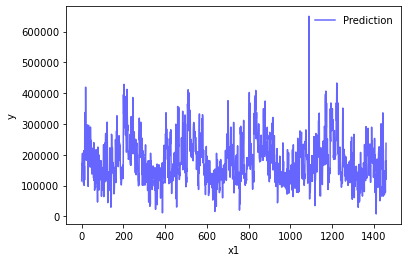

In [24]:
plt.plot(testData.index, lasso_model.predict(testData),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

### Generación del archivo de salida, prueba con Kaggle
En este apartado se genera el archivo *output.csv* con los valores predecidos para los datos de validación. El objetivo es hacer el *submit* en Kaggle.

In [25]:
outputData = pd.DataFrame(data={'SalePrice':lasso_model.predict(testData)})
outputData.index += 1461
outputData.to_csv("output.csv")
outputData

,SalePrice
1461,115073.939866
1462,171684.249713
1463,166051.148681
1464,192381.803760
1465,204610.311757
...,...
2915,92764.467503
2916,78174.169502
2917,180599.058636
2918,119973.124097


Campo de comentarios varios y programación  **Score: 0.17724** 